In [1]:
#%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim  as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Training and Test Datasets
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# trainloader put the training set into batches
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



100%|██████████| 170498071/170498071 [00:02<00:00, 80641216.22it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


horse   dog  frog   dog


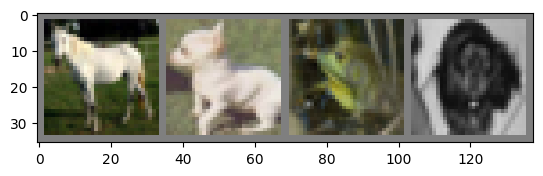

In [4]:
# Running a check on the output from DataLoader:

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
  img = img / 2 + 0.5 # Unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
#  If you pass an iterable object (like a list, tuple, or string) to iter(), it returns an iterator for that object.
#  This allows you to iterate over the elements of the iterable using a loop, such as a for loop.
# Here, my_iter is an iterator over my_list, and next() is used to get the next element from the iterator.
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
# Next is the Model we will train on. It is similar to LeNet (adopted for 3-color images)

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5) # (in_channel, out_channel, kernel_size (filter))
    self.pool = nn.MaxPool2d(2,2 )
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x= self.fc3(x)
    return x


net = Net()


###     Contiguity:
        view(): Requires the tensor to be contiguous. If the tensor is not contiguous, you must call contiguous() before using view().
        reshape(): Does not require the tensor to be contiguous and will create a copy if necessary.

    Performance:
        view(): Generally more efficient if the tensor is already contiguous since it doesn't need to create a copy.
        reshape(): Can handle both contiguous and non-contiguous tensors but might be less efficient for non-contiguous tensors because it may need to create a copy.

    Flexibility:
        view(): Less flexible due to the contiguity requirement.
        reshape(): More flexible as it automatically handles both contiguous and non-contiguous tensors.

In [ ]:
# Final ingredients we need is a loss function and an optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

The loss function, as previously mentioned in this video, quantifies how far the model's prediction deviates from our desired output. Cross-entropy loss stands out as a common choice for classification models like the one we're using.

The optimizer is pivotal in driving the learning process. Here, we've designed an optimizer that employs stochastic gradient descent, a fairly straightforward optimization technique. In addition to the algorithm's parameters such as the learning rate (lr) and momentum, we provide net.parameters(), encompassing all the model's learning weights, for the optimizer to adjust.

Lastly, these components are integrated into the training loop.

In [ ]:
for epoch in range(2): # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs
    inputs, labels = data


